In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 

from recidiviz.calculator.modeling.population_projection.simulations.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml

In [2]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/VA/VA_prison_model_inputs.yaml')
test_sim.simulate_baseline(['prison'])

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1728: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 56 results
transitions_data returned 570 results
total_population_data returned 0 results


ValueError: Only 'middle' projection_type is supported for constant admissions

initialization time:  0.07066082954406738
simulation_time:  17.671985149383545
initialization time:  0.06811094284057617
simulation_time:  18.81568694114685


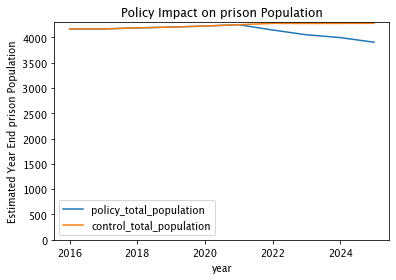

In [3]:
affected_crimes = {
    'ASL1342': 0.5, 
    'NAR3038': 3, 
    'NAR3087': 10, 
    'DWI5406': 1, 
    'DWI5449': 0.25, 
    'DWI5450': 0.5, 
    'LIC6834': 1, 
    'LIC6860': 1, 
    'WPN5296': 5,   
    'WPN5297': 2
}


# Policy Option Methods
def abolish_mm(mm, retroactive=False):
    return partial(IncarceratedTransitions.abolish_mandatory_minimum, 
                   current_mm=mm, 
                   outflow = 'release',
                   retroactive=retroactive)


policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_mm(affected_crimes[crime]),
                spark_compartment='prison',
                sub_population={'offense_code': crime},
                apply_retroactive=False)
    for crime in affected_crimes
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

In [4]:
simulation_tag = 'VA_SB_5046'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

/Users/justine/.local/share/virtualenvs/recidiviz-research--v7DE6HN/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [5]:
test_results

(      jail  release        prison
 year                             
 2016   0.0      0.0  0.000000e+00
 2017   0.0      0.0  0.000000e+00
 2018   0.0      0.0  0.000000e+00
 2019   0.0      0.0  0.000000e+00
 2020   0.0      0.0  0.000000e+00
 2021   0.0      0.0  0.000000e+00
 2022   0.0     -0.0  1.315663e+07
 2023   0.0     -0.0  3.163027e+07
 2024   0.0     -0.0  5.424741e+07
 2025   0.0     -0.0  8.023826e+07,
       jail      release       prison
 year                                
 2016   0.0     0.000000     0.000000
 2017   0.0     0.000000     0.000000
 2018   0.0     0.000000     0.000000
 2019   0.0     0.000000     0.000000
 2020   0.0     0.000000     0.000000
 2021   0.0     0.000000     0.000000
 2022   0.0  -409.277499   409.277498
 2023   0.0  -983.956718   983.956715
 2024   0.0 -1687.532192  1687.532187
 2025   0.0 -2496.057356  2496.057350)

In [6]:
test_sim.output_data['life_years']

,jail,release,prison
year,,,
2016,0.0,0.000000,0.000000
2017,0.0,0.000000,0.000000
2018,0.0,0.000000,0.000000
2019,0.0,0.000000,0.000000
2020,0.0,0.000000,0.000000
2021,0.0,0.000000,0.000000
2022,0.0,-409.277499,409.277498
2023,0.0,-983.956718,983.956715
2024,0.0,-1687.532192,1687.532187


In [7]:
test_sim.output_data['cost_avoidance']

,jail,release,prison
year,,,
2016,0.0,0.0,0.000000e+00
2017,0.0,0.0,0.000000e+00
2018,0.0,0.0,0.000000e+00
2019,0.0,0.0,0.000000e+00
2020,0.0,0.0,0.000000e+00
2021,0.0,0.0,0.000000e+00
2022,0.0,-0.0,1.315663e+07
2023,0.0,-0.0,3.163027e+07
2024,0.0,-0.0,5.424741e+07
